In [38]:
import numpy as np

import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt

# Apprentissage non supervisé

## 1. Lecture des données : Villes

In [39]:
datavilles=pd.read_csv('villes.csv',sep=';',header=0)

In [40]:
datavilles.head(10)

,ville,janv,fev,mars,avril,mai,juin,juil,aout,sept,oct,nov,dec
0,ajac,7.7,8.7,10.5,12.6,15.9,19.8,22.0,22.2,20.3,16.3,11.8,8.7
1,ange,4.2,4.9,7.9,10.4,13.6,17.0,18.7,18.4,16.1,11.7,7.6,4.9
2,ango,4.6,5.4,8.9,11.3,14.5,17.2,19.5,19.4,16.9,12.5,8.1,5.3
3,besa,1.1,2.2,6.4,9.7,13.6,16.9,18.7,18.3,15.5,10.4,5.7,2.0
4,biar,7.6,8.0,10.8,12.0,14.7,17.8,19.7,19.9,18.5,14.8,10.9,8.2
5,bord,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2
6,bres,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0
7,cler,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6
8,dijo,1.3,2.6,6.9,10.4,14.3,17.7,19.6,19.0,15.9,10.5,5.7,2.1
9,embr,0.5,1.6,5.7,9.0,13.0,16.4,18.9,18.3,15.3,10.1,4.6,0.5


In [41]:
datavilles.shape

(32, 13)

In [42]:
type(datavilles)

pandas.core.frame.DataFrame

In [43]:
noms=datavilles.iloc[:,0].values
X=datavilles.iloc[:,1:].values

In [44]:
noms

array(['ajac', 'ange', 'ango', 'besa', 'biar', 'bord', 'bres', 'cler',
       'dijo', 'embr', 'gren', 'lill', 'limo', 'lyon', 'mars', 'mont',
       'nanc', 'nant', 'nice', 'nime', 'orle', 'pari', 'perp', 'reim',
       'renn', 'roue', 'stqu', 'stra', 'toul', 'tlse', 'tour', 'vich'],
      dtype=object)

In [45]:
noms.shape

(32,)

In [46]:
X

array([[ 7.7,  8.7, 10.5, 12.6, 15.9, 19.8, 22. , 22.2, 20.3, 16.3, 11.8,
         8.7],
       [ 4.2,  4.9,  7.9, 10.4, 13.6, 17. , 18.7, 18.4, 16.1, 11.7,  7.6,
         4.9],
       [ 4.6,  5.4,  8.9, 11.3, 14.5, 17.2, 19.5, 19.4, 16.9, 12.5,  8.1,
         5.3],
       [ 1.1,  2.2,  6.4,  9.7, 13.6, 16.9, 18.7, 18.3, 15.5, 10.4,  5.7,
         2. ],
       [ 7.6,  8. , 10.8, 12. , 14.7, 17.8, 19.7, 19.9, 18.5, 14.8, 10.9,
         8.2],
       [ 5.6,  6.6, 10.3, 12.8, 15.8, 19.3, 20.9, 21. , 18.6, 13.8,  9.1,
         6.2],
       [ 6.1,  5.8,  7.8,  9.2, 11.6, 14.4, 15.6, 16. , 14.7, 12. ,  9. ,
         7. ],
       [ 2.6,  3.7,  7.5, 10.3, 13.8, 17.3, 19.4, 19.1, 16.2, 11.2,  6.6,
         3.6],
       [ 1.3,  2.6,  6.9, 10.4, 14.3, 17.7, 19.6, 19. , 15.9, 10.5,  5.7,
         2.1],
       [ 0.5,  1.6,  5.7,  9. , 13. , 16.4, 18.9, 18.3, 15.3, 10.1,  4.6,
         0.5],
       [ 1.5,  3.2,  7.7, 10.6, 14.5, 17.8, 20.1, 19.5, 16.7, 11.4,  6.5,
         2.3],
       [ 2.4,  2.9,  

## 2. Réduction de dimensions (ACP) : Villes

In [47]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [48]:
ss=StandardScaler()

#X_norm=ss.fit_transform(X)

ss.fit(X)
X_norm=ss.transform(X)

In [49]:
pca=PCA(n_components=12)
pca.fit(X_norm)

PCA(n_components=12)

### 2.1. Affichage d'une composante

In [50]:
pca.explained_variance_ratio_

array([8.72681935e-01, 1.17206018e-01, 4.69562816e-03, 2.64791321e-03,
       1.13528034e-03, 5.01361084e-04, 4.22889550e-04, 3.28173500e-04,
       1.51658537e-04, 1.17643729e-04, 8.36434653e-05, 2.78555007e-05])

In [51]:
pca.components_[0]

array([0.27151028, 0.28846164, 0.3010811 , 0.30354174, 0.28353089,
       0.27841907, 0.27290295, 0.28757774, 0.30472022, 0.3038548 ,
       0.29242808, 0.2729549 ])

### 2.2. Choix du nombre de composantes

#### Critère de coude

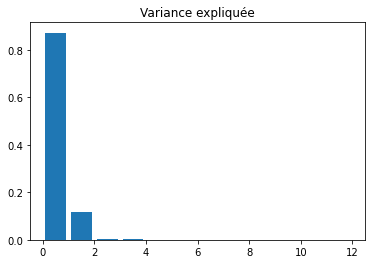

In [70]:
plt.bar(np.arange(len(pca.explained_variance_ratio_))+0.5, pca.explained_variance_ratio_)
plt.title("Variance expliquée")
plt.show()

#### Critère de Kaiser

In [71]:
print(pca.explained_variance_)

[1.08099956e+01 1.45184229e+00 5.81652004e-02 3.27999571e-02
 1.40628275e-02 6.21040827e-03 5.23837378e-03 4.06511690e-03
 1.87860897e-03 1.45726425e-03 1.03609970e-03 3.45048783e-04]


### 2.3 Interprétation des composantes choisies

In [54]:
pca.components_[0]

array([0.27151028, 0.28846164, 0.3010811 , 0.30354174, 0.28353089,
       0.27841907, 0.27290295, 0.28757774, 0.30472022, 0.3038548 ,
       0.29242808, 0.2729549 ])

In [55]:
pca.components_[1]

array([ 0.39933494,  0.29907184,  0.12943051, -0.11530598, -0.32314291,
       -0.35846763, -0.38879639, -0.3010133 , -0.11231622,  0.12249226,
        0.26269461,  0.38693688])

### 2.4 Visualisation des instances

#### Construction du jeu de données transformées

In [56]:
X_pca=pca.transform(X_norm)

#### Visualisation

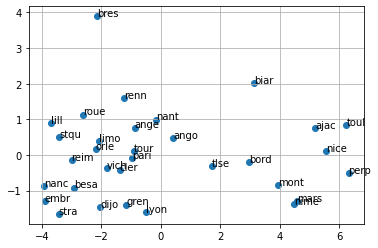

In [61]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for etiquette, x1, x2 in zip(noms, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(etiquette, xy=(x1, x2))

plt.grid()
plt.show()


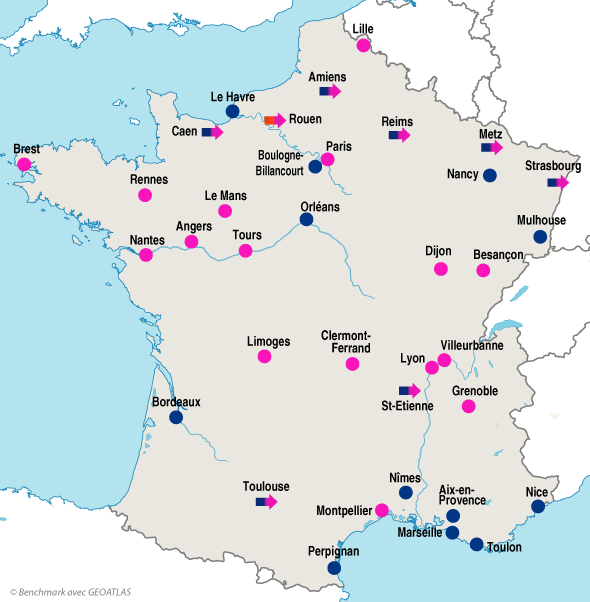

## 3. Clustering des données Villes

### 3.1 Kmeans

In [21]:
from sklearn.cluster import KMeans,AgglomerativeClustering

In [72]:
km=KMeans(n_clusters=3)
km.fit(X_norm)


KMeans(n_clusters=3)

In [73]:
y_pred=km.labels_
y_pred

array([1, 2, 2, 0, 1, 1, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 1, 2, 2,
       1, 0, 2, 2, 0, 0, 1, 1, 2, 2])

#### Visualisation

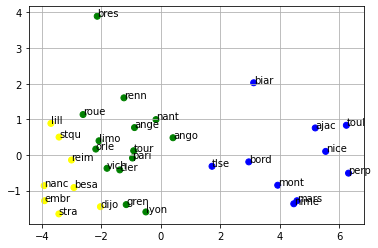

In [74]:
import matplotlib.colors as col
colors = ['yellow','blue','green']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap=col.ListedColormap(colors))
for etiquette, x1, x2 in zip(noms, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(
        etiquette,
        xy=(x1, x2))
plt.grid()
plt.show()

#### Choix du nombre de clusters pour K-means

In [75]:
from sklearn import metrics

for i in np.arange(2, 6):
    y_pred = KMeans(n_clusters=i).fit_predict(X_norm)
    print('La silhouette index pour {0:d} classes est {1:3f}'.format(i, metrics.silhouette_score(X_norm, y_pred,metric='euclidean')))
    print()
    

La silhouette index pour 2 classes est 0.625558

La silhouette index pour 3 classes est 0.389716

La silhouette index pour 4 classes est 0.328958

La silhouette index pour 5 classes est 0.339438



### 3.2 CAH

#### Critère Ward

In [32]:
y_pred = AgglomerativeClustering(n_clusters=2,
                                 linkage="ward", affinity='euclidean').fit_predict(X_norm)

#### Visualisation

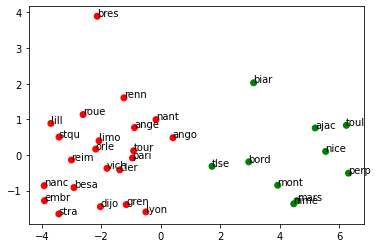

In [33]:
import matplotlib.colors as col
colors = ['red','yellow','blue','green']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap=col.ListedColormap(colors))
for etiquette, x1, x2 in zip(noms, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(
        etiquette,
        xy=(x1, x2), xytext=(-0.2, 0.2),
        textcoords='offset points')

plt.show()

#### Critère Average

In [34]:
y_pred = AgglomerativeClustering(n_clusters=3,
                                 linkage="ward", affinity='euclidean').fit_predict(X_norm)

#### Visualisation

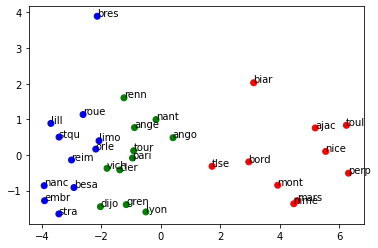

In [35]:
import matplotlib.colors as col
colors = ['red','yellow','blue','green']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap=col.ListedColormap(colors))
for etiquette, x1, x2 in zip(noms, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(
        etiquette,
        xy=(x1, x2), xytext=(-0.2, 0.2),
        textcoords='offset points')

plt.show()

#### Dendrogramme

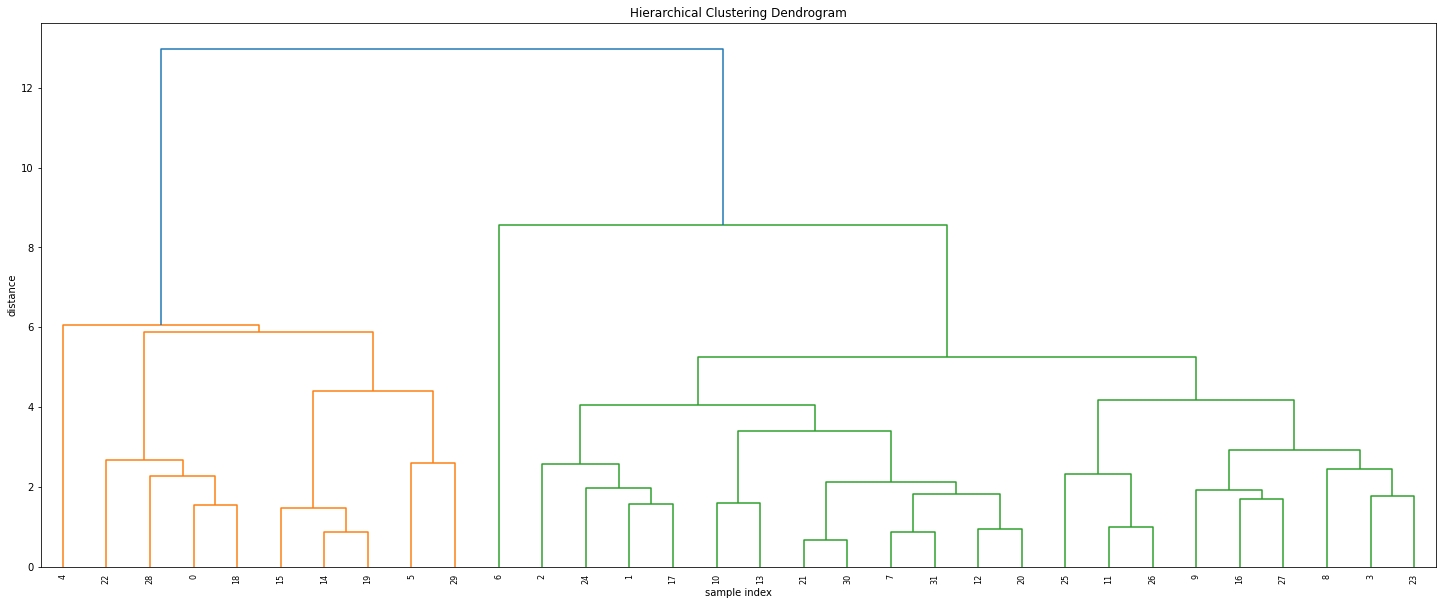

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, 'average')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

#### Choix du nombre de clusters pour CAH

In [37]:
for i in np.arange(2, 6):
    y_pred = AgglomerativeClustering(n_clusters=i,linkage="average", affinity='euclidean').fit_predict(X_norm)
    print('La silhouette index pour {0:d} classes est {1:3f}'.format(i, metrics.silhouette_score(X_norm, y_pred,metric='euclidean')))
    print()

La silhouette index pour 2 classes est 0.625558

La silhouette index pour 3 classes est 0.495687

La silhouette index pour 4 classes est 0.404092

La silhouette index pour 5 classes est 0.339438

